In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/HAR/train.csv")
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/HAR/test.csv")
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [ ]:
train.shape

(7352, 563)

In [ ]:
test.shape

(2947, 563)

In [ ]:
print(train.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [ ]:
#target variables or outcomes
activities = train['Activity'].unique()
print(activities)

['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [ ]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [ ]:
train.nunique()

tBodyAcc-mean()-X       7347
tBodyAcc-mean()-Y       7352
tBodyAcc-mean()-Z       7349
tBodyAcc-std()-X        7349
tBodyAcc-std()-Y        7351
                        ... 
angle(X,gravityMean)    7352
angle(Y,gravityMean)    7352
angle(Z,gravityMean)    7352
subject                   21
Activity                   6
Length: 563, dtype: int64

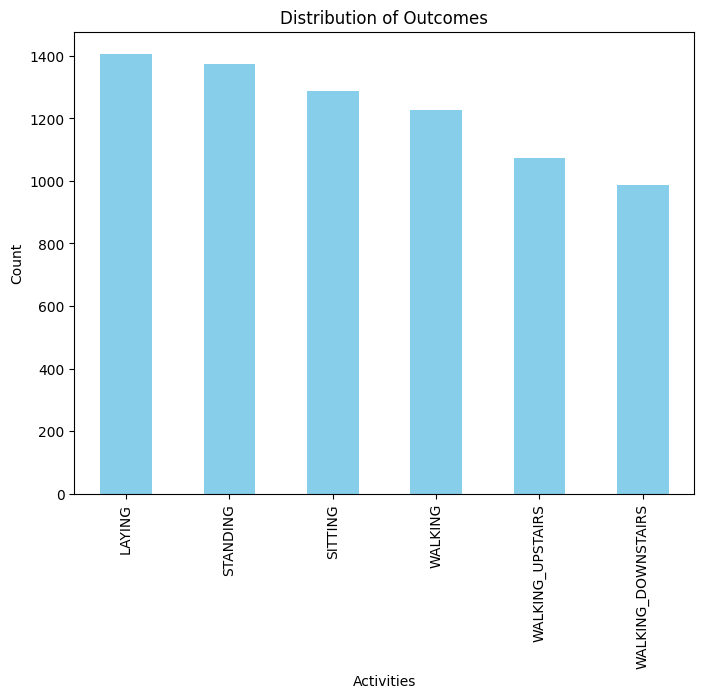

In [ ]:
#training data
count = train['Activity'].value_counts()
plt.figure(figsize=(8, 6))
count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Outcomes')
plt.xlabel('Activities')
plt.ylabel('Count')

plt.show()

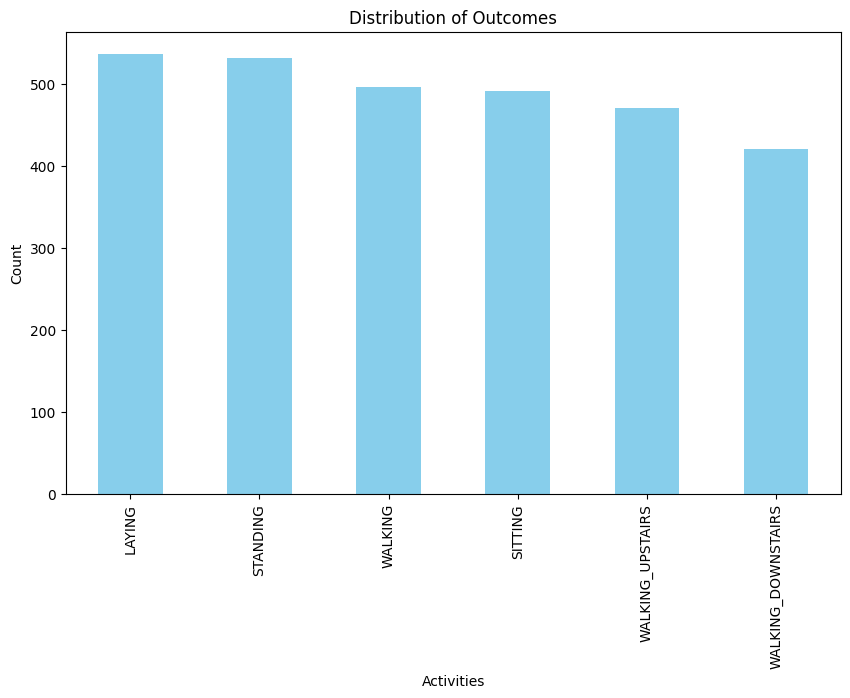

In [ ]:
#testing data
count = test['Activity'].value_counts()
plt.figure(figsize=(10, 6))
count.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Distribution of Outcomes')
plt.xlabel('Activities')
plt.ylabel('Count')

plt.show()

In [ ]:
import plotly.express as px
fig = px.histogram(train, x='Activity', title='Data provided by each user', color="subject")#,pattern_shape="subject"
fig.show()
del fig

In [ ]:
#rows
train_dup = train.duplicated()
test_dup = test.duplicated()
print("Duplicates in train data: ",train_dup.sum())
print("Duplicates in test data: ",test_dup.sum())

Duplicates in train data:  0
Duplicates in test data:  0


In [ ]:
print("Total null values in train data : ",train.isnull().values.sum())
print("Total null values in test data : ",test.isnull().values.sum())

Total null values in train data :  0
Total null values in test data :  0


In [ ]:
dup_col_count = train.columns.duplicated().sum()

dup_col = train.columns[train.columns.duplicated()].tolist()

print("Count of Duplicate Columns:", dup_col_count)
print("Duplicated Columns:", dup_col)

Count of Duplicate Columns: 0
Duplicated Columns: []


In [ ]:
data=train.drop(dup_col,axis=1)

In [ ]:
data.shape

(7352, 563)

In [ ]:
col = train.columns[0:9]
fig = px.box(train, y=col)#, points="all"
fig.show()
del fig, col

<ipython-input-20-7d00b31791ff>:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-20-7d00b31791ff>:14: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-20-7d00b31791ff>:15: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adap

<Axes: title={'center': 'Dynamic Activities'}, xlabel='tBodyAccMag-mean()', ylabel='Density'>

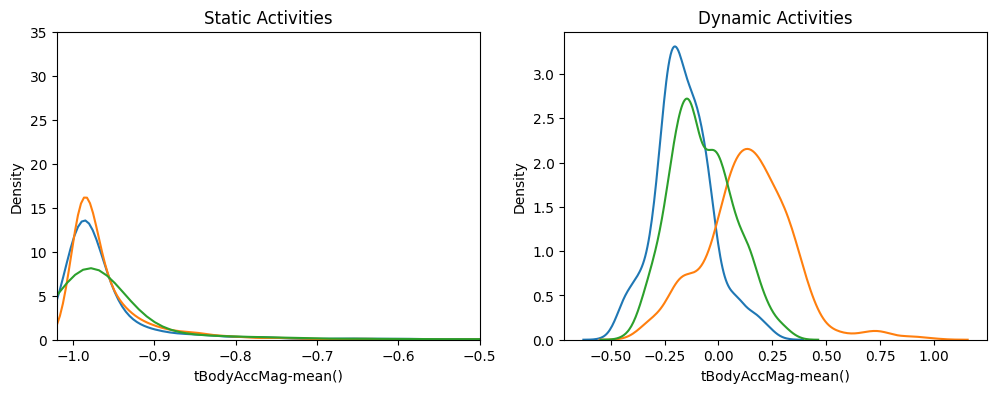

In [ ]:
import seaborn as sns
# for plotting purposes taking datapoints of each activity to a different dataframe
# df1 = train[train['Activity']==1]
# df2 = train[train['Activity']==2]
# df3 = train[train['Activity']==3]
# df4 = train[train['Activity']==4]
# df5 = train[train['Activity']==5]
# df6 = train[train['Activity']==6]

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Static Activities")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')

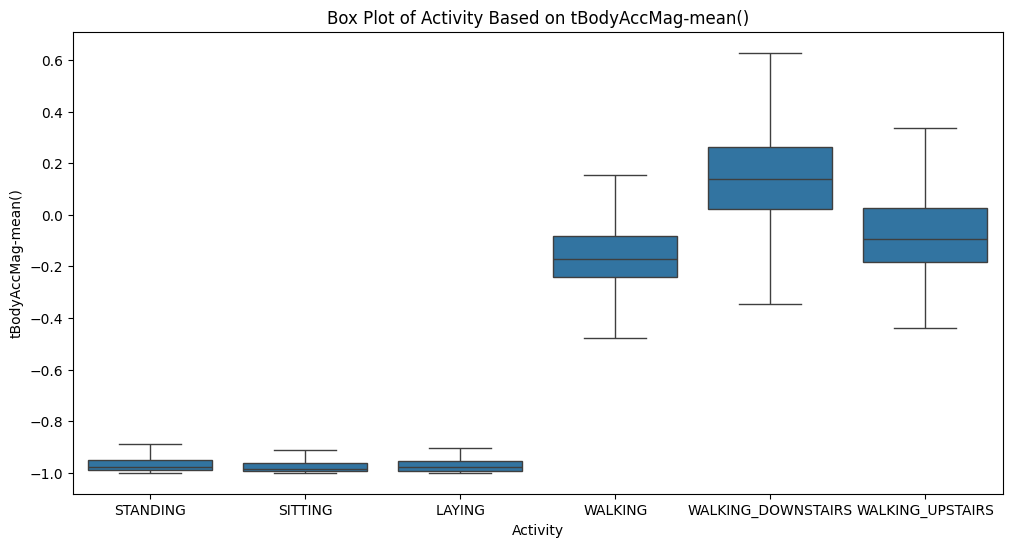

In [ ]:
outcome_column = 'Activity'

# Draw the box plot without scatter points
plt.figure(figsize=(12, 6))
sns.boxplot(x=outcome_column, y='tBodyAccMag-mean()', data=train, showfliers=False)
plt.title('Box Plot of ' + outcome_column + ' Based on tBodyAccMag-mean()')
plt.xlabel(outcome_column)
plt.ylabel('tBodyAccMag-mean()')
plt.show()

In [ ]:
train['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30])

In [ ]:
X = train.drop(['Activity'], axis=1)
y = train['Activity']

# categorical to numerical


In [ ]:
from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()
encoder.fit(y)
y=encoder.transform(y)
y


array([2, 2, 2, ..., 5, 5, 5])

In [ ]:
y[5]

2

In [ ]:
# encoder.classes_[5]

In [ ]:
# min_value = X.min()
# max_value = X.max()

# print("Minimum value in the dataset:", min_value)
# print("Maximum value in the dataset:", max_value)


#Feature scaling


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
feature_names = train.columns.tolist()
print("Feature Names:", feature_names)

Feature Names: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc

# Splitting of dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(score_func=f_classif, k=20)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_feature_indices = selector.get_support(indices=True)

selected_feature_names = [feature_names[i] for i in selected_feature_indices]

print("Selected Features:", selected_feature_names)


Selected Features: ['tBodyAcc-std()-X', 'tBodyAcc-max()-X', 'tGravityAcc-mean()-X', 'tGravityAcc-max()-X', 'tGravityAcc-min()-X', 'tGravityAcc-energy()-X', 'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-entropy()-Y', 'tBodyAccJerk-entropy()-Z', 'tBodyAccJerkMag-entropy()', 'fBodyAcc-mean()-X', 'fBodyAcc-std()-X', 'fBodyAcc-mad()-X', 'fBodyAcc-sma()', 'fBodyAcc-entropy()-X', 'fBodyAccJerk-entropy()-X', 'fBodyAccJerk-entropy()-Y', 'fBodyAccJerk-entropy()-Z', 'fBodyBodyAccJerkMag-entropy()', 'angle(X,gravityMean)']


In [ ]:
# quadratic
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train_selected, y_train)

accuracy = qda.score(X_test_selected, y_test)
print("Accuracy of Quadratic Discriminant Analysis on testing data:", accuracy)


Accuracy of Quadratic Discriminant Analysis on testing data: 0.8280081577158396


In [ ]:
#XG
import xgboost as xgb
from sklearn.metrics import accuracy_score
model = xgb.XGBClassifier()
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.946974847042828


In [ ]:
# svm with sgd

from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification

svm_sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=0.001, max_iter=1000, random_state=42)

svm_sgd.fit(X_train_selected, y_train)

y_pred = svm_sgd.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8647178789938818


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3)
model.fit(X_train_selected, y_train, verbose=10)

predictions = model.predict(X_test_selected)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


0:	learn: 1.5661834	total: 55ms	remaining: 5.45s
10:	learn: 0.8006995	total: 121ms	remaining: 981ms
20:	learn: 0.5825600	total: 191ms	remaining: 718ms
30:	learn: 0.4904588	total: 255ms	remaining: 568ms
40:	learn: 0.4366513	total: 318ms	remaining: 458ms
50:	learn: 0.4024427	total: 386ms	remaining: 371ms
60:	learn: 0.3781445	total: 468ms	remaining: 299ms
70:	learn: 0.3613188	total: 533ms	remaining: 218ms
80:	learn: 0.3458358	total: 594ms	remaining: 139ms
90:	learn: 0.3313232	total: 664ms	remaining: 65.6ms
99:	learn: 0.3234364	total: 722ms	remaining: 0us
Accuracy: 0.8721957851801495


In [ ]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

base_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

bagging_classifier = BaggingClassifier(base_classifier, n_estimators=50, max_samples=0.8, max_features=0.8, random_state=42)

bagging_classifier.fit(X_train_selected, y_train)

y_pred = bagging_classifier.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9265805574439157


# feature extraction


**LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)

X_test_lda = lda.transform(X_test)

train_lda_df = pd.DataFrame(X_train_lda, columns=['LDA_Component_1', 'LDA_Component_2'])

test_lda_df = pd.DataFrame(X_test_lda, columns=['LDA_Component_1', 'LDA_Component_2'])

print("Training data with LDA components:")
print(train_lda_df)

print("\nTesting data with LDA components:")
print(test_lda_df)


Training data with LDA components:
      LDA_Component_1  LDA_Component_2
0          -15.029229         9.021627
1           14.573409         2.271133
2           15.782223         1.570733
3          -10.263960        -7.902749
4           -9.726727        -8.026437
...               ...              ...
5876        14.480368         0.298801
5877        14.658544         1.922502
5878        13.130888        -0.001449
5879       -10.448229        -7.227628
5880        14.336903         0.416335

[5881 rows x 2 columns]

Testing data with LDA components:
      LDA_Component_1  LDA_Component_2
0           14.838312         1.521056
1           17.036543         2.248315
2           13.689230        -0.170363
3           -9.465249        -8.629316
4           15.426852         2.584423
...               ...              ...
1466       -16.905996        12.274821
1467       -10.487469        -7.397064
1468       -10.166357        -4.375678
1469        -9.693683        -6.791524
1470    

Accuracy of Quadratic Discriminant Analysis on testing data: 0.7273963290278722


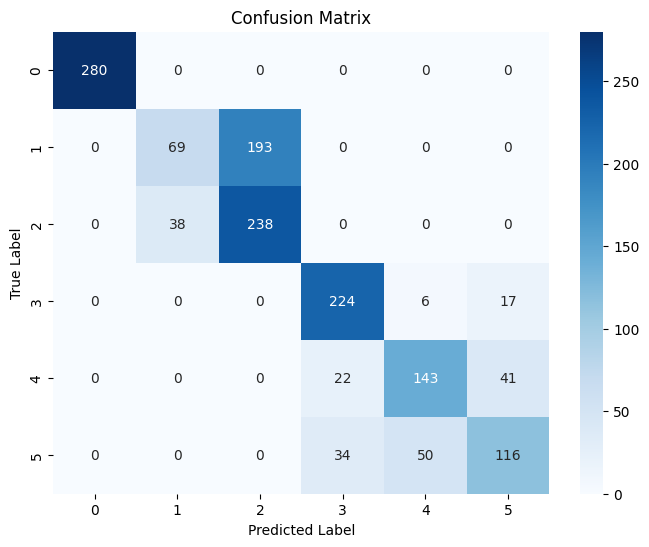

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.64      0.26      0.37       262
           2       0.55      0.86      0.67       276
           3       0.80      0.91      0.85       247
           4       0.72      0.69      0.71       206
           5       0.67      0.58      0.62       200

    accuracy                           0.73      1471
   macro avg       0.73      0.72      0.70      1471
weighted avg       0.73      0.73      0.71      1471



In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train_lda, y_train)

accuracy = qda.score(X_test_lda, y_test)
print("Accuracy of Quadratic Discriminant Analysis on testing data:", accuracy)

y_pred = qda.predict(X_test_lda)
cm = confusion_matrix(y_test, y_pred)

class_labels = sorted(set(y_test))
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

In [ ]:
#xg+ lda

import xgboost as xgb
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier()

model.fit(X_train_lda, y_train)

y_pred = model.predict(X_test_lda)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7070020394289599


In [ ]:
# svm with sgd

from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification

svm_sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=0.001, max_iter=1000, random_state=42)

svm_sgd.fit(X_train_lda, y_train)

y_pred = svm_sgd.predict(X_test_lda)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7049626104690686


In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3)
model.fit(X_train_lda, y_train, verbose=10)

predictions = model.predict(X_test_lda)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


0:	learn: 1.5643485	total: 21.7ms	remaining: 2.15s
10:	learn: 0.8123681	total: 114ms	remaining: 918ms
20:	learn: 0.6179530	total: 203ms	remaining: 764ms
30:	learn: 0.5518820	total: 304ms	remaining: 678ms
40:	learn: 0.5207862	total: 410ms	remaining: 590ms
50:	learn: 0.5034244	total: 519ms	remaining: 499ms
60:	learn: 0.4954432	total: 636ms	remaining: 407ms
70:	learn: 0.4874718	total: 748ms	remaining: 306ms
80:	learn: 0.4821641	total: 863ms	remaining: 202ms
90:	learn: 0.4774229	total: 974ms	remaining: 96.4ms
99:	learn: 0.4743246	total: 1.1s	remaining: 0us
Accuracy: 0.7144799456152278


In [ ]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

base_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

bagging_classifier = BaggingClassifier(base_classifier, n_estimators=50, max_samples=0.8, max_features=0.8, random_state=42)

bagging_classifier.fit(X_train_lda, y_train)

y_pred = bagging_classifier.predict(X_test_lda)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6648538409245411


# LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


In [ ]:
X_train = train.drop('Activity',axis=1)
y_train= train['Activity']

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

X_train_array = X_train.values
y_train_array = y_train.values

# Define the number of time steps
time_steps = 10  # Adjust this value based on your preference

# Reshape X_train to include time steps dimension
num_samples = X_train_array.shape[0]
num_features = X_train_array.shape[1]
X_train_reshaped = np.zeros((num_samples - time_steps + 1, time_steps, num_features))

for i in range(num_samples - time_steps + 1):
    X_train_reshaped[i] = X_train_array[i:i+time_steps]

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Assuming y_train_array contains categorical labels represented as strings

# Encode categorical labels into numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_array)

# Convert numerical labels into one-hot encoded format
y_train_encoded_onehot = to_categorical(y_train_encoded)

# Define the number of classes
num_classes = y_train_encoded_onehot.shape[1]  # Number of classes in the target variable


# Define the model
model = Sequential()
model.add(LSTM(100, input_shape=(time_steps, num_features)))
model.add(Dense(num_classes, activation='softmax'))  # Use softmax activation for multi-class classification


In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:

# Train the model
model.fit(X_train_reshaped, y_train_encoded_onehot[time_steps-1:], epochs=10, batch_size=32, validation_split=0.2)


In [ ]:
X_test = test.drop('Activity',axis=1)
y_test= test['Activity']

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

X_test_array = X_test.values
y_test_array = y_test.values
y_test_encoded = label_encoder.fit_transform(y_test_array)

time_steps = 10

num_samples = X_test_array.shape[0]
num_features = X_test_array.shape[1]
X_test_reshaped = np.zeros((num_samples - time_steps + 1, time_steps, num_features))

for i in range(num_samples - time_steps + 1):
    X_test_reshaped[i] = X_test_array[i:i+time_steps]

y_test_encoded_onehot = to_categorical(y_test_encoded)

num_classes = y_test_encoded_onehot.shape[1]


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test_array)

y_test_encoded_onehot = to_categorical(y_test_encoded)


In [ ]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test_encoded_onehot[time_steps-1:])
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


# BILSTM


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional,LSTM, Dense
import numpy as np

X_train = train.drop('Activity',axis=1)
y_train= train['Activity']

X_train_array = X_train.values
y_train_array = y_train.values

time_steps = 10

num_samples = X_train_array.shape[0]
num_features = X_train_array.shape[1]
X_train_reshaped = np.zeros((num_samples - time_steps + 1, time_steps, num_features))

for i in range(num_samples - time_steps + 1):
    X_train_reshaped[i] = X_train_array[i:i+time_steps]

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_array)

y_train_encoded_onehot = to_categorical(y_train_encoded)

num_classes = y_train_encoded_onehot.shape[1]

model = Sequential()
model.add(Bidirectional(LSTM(100, input_shape=(time_steps, num_features))))
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train
model.fit(X_train_reshaped, y_train_encoded_onehot[time_steps-1:], epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
184/184 [==============================] - 14s 45ms/step - loss: 0.4362 - accuracy: 0.8340 - val_loss: 0.2466 - val_accuracy: 0.9115
Epoch 2/10
184/184 [==============================] - 9s 47ms/step - loss: 0.1106 - accuracy: 0.9654 - val_loss: 0.2012 - val_accuracy: 0.9217
Epoch 3/10
184/184 [==============================] - 7s 37ms/step - loss: 0.0646 - accuracy: 0.9791 - val_loss: 0.1187 - val_accuracy: 0.9578
Epoch 4/10
184/184 [==============================] - 9s 50ms/step - loss: 0.0520 - accuracy: 0.9830 - val_loss: 0.3426 - val_accuracy: 0.8884
Epoch 5/10
184/184 [==============================] - 10s 57ms/step - loss: 0.0393 - accuracy: 0.9876 - val_loss: 0.3455 - val_accuracy: 0.8931
Epoch 6/10
184/184 [==============================] - 7s 38ms/step - loss: 0.0285 - accuracy: 0.9915 - val_loss: 0.1378 - val_accuracy: 0.9346
Epoch 7/10
184/184 [==============================] - 9s 48ms/step - loss: 0.0312 - accuracy: 0.9894 - val_loss: 0.1376 - val_accuracy: 0.94

In [ ]:
X_test = test.drop('Activity',axis=1)
y_test= test['Activity']

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

X_test_array = X_test.values
y_test_array = y_test.values
y_test_encoded = label_encoder.fit_transform(y_test_array)

time_steps = 10

num_samples = X_test_array.shape[0]
num_features = X_test_array.shape[1]
X_test_reshaped = np.zeros((num_samples - time_steps + 1, time_steps, num_features))

for i in range(num_samples - time_steps + 1):
    X_test_reshaped[i] = X_test_array[i:i+time_steps]

y_test_encoded_onehot = to_categorical(y_test_encoded)
num_classes = y_test_encoded_onehot.shape[1]


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test_array)

y_test_encoded_onehot = to_categorical(y_test_encoded)


In [ ]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test_encoded_onehot[time_steps-1:])
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


92/92 [==============================] - 2s 19ms/step - loss: 0.1625 - accuracy: 0.9489
Test Loss: 0.16251441836357117
Test Accuracy: 0.9489448666572571
